<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [11]:
import matplotlib.pyplot as plt

% matplotlib inline

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [13]:
boston_df = pd.read_csv('data/boston_data.csv')
boston_df.head()
#read csv to use pandas for data exploration

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
boston_df.shape
#Data shape

(506, 15)

In [15]:
boston_df.dtypes
#Data types

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [16]:
boston_df.isnull().sum()
#Count of null values by column

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [17]:
boston_df.describe()
#Basic summary statistics

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
boston_df.agg('nunique')
#Number of unique values for each column

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
B             357
LSTAT         455
MEDV          229
dtype: int64

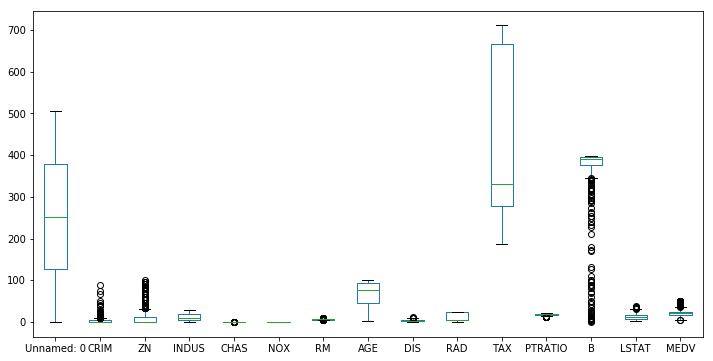

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

boston_df.plot(kind='box', ax=ax);
#Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)

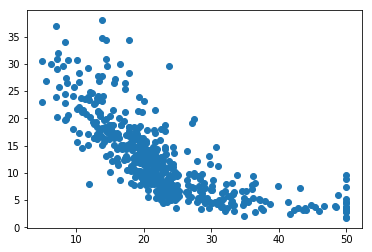

In [21]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['LSTAT'])

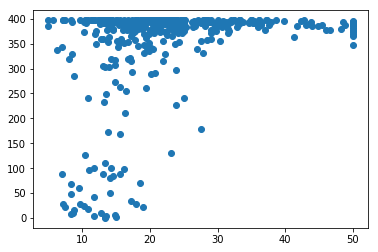

In [23]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['B'])

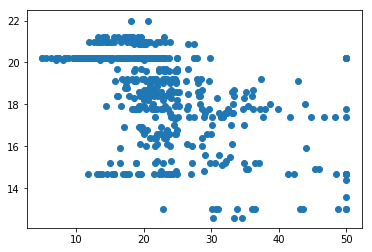

In [24]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['PTRATIO'])

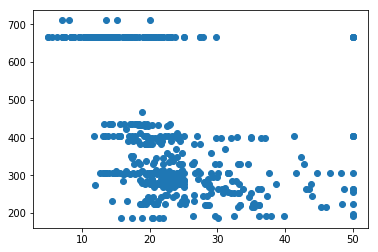

In [25]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['TAX'])

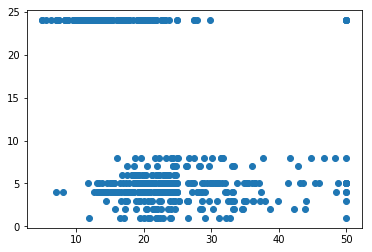

In [26]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['RAD'])

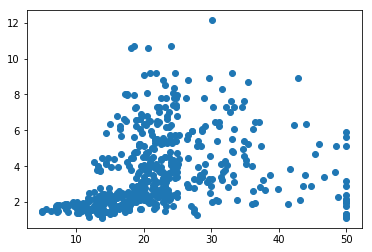

In [28]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['DIS'])

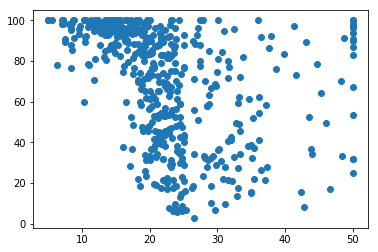

In [29]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['AGE'])

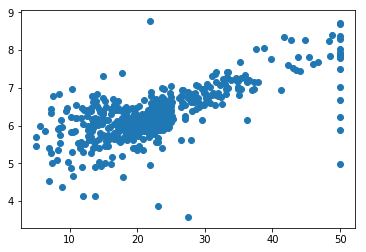

In [30]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['RM'])

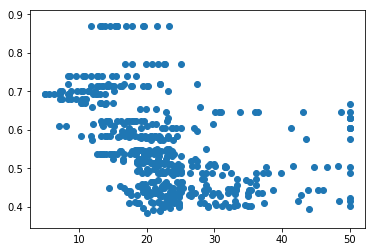

In [31]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['NOX'])

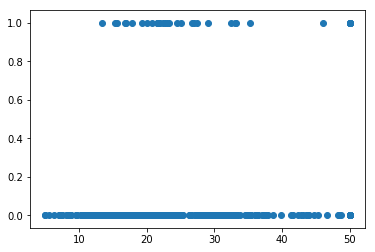

In [32]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['CHAS'])

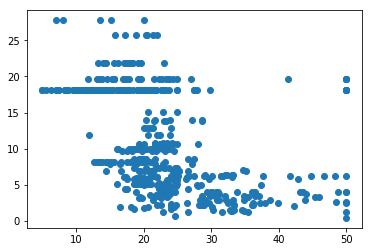

In [33]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['INDUS'])

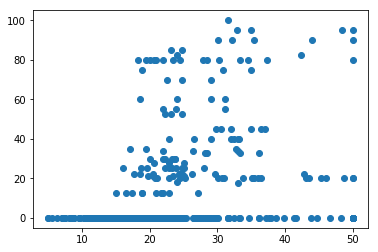

In [34]:
#Scatterplot of each column with median price
plt.scatter(boston_df['MEDV'], boston_df['ZN'])

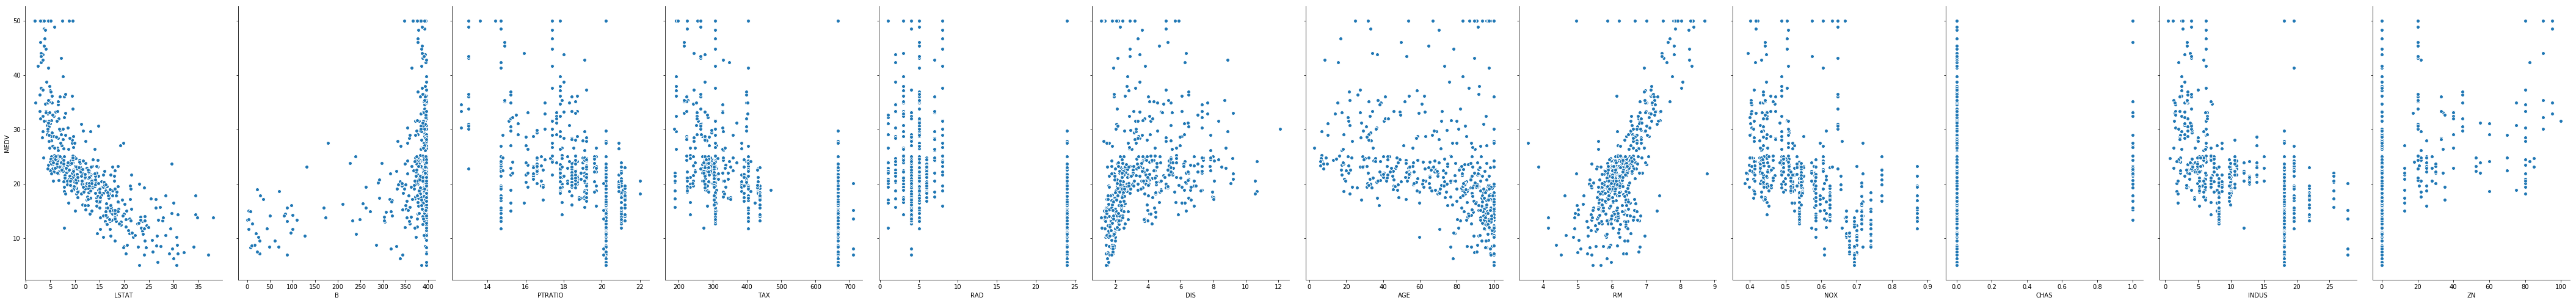

In [22]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
feature_cols = ['LSTAT','B','PTRATIO', 'TAX', 'RAD', 'DIS', 'AGE', 'RM', 'NOX', 'CHAS', 'INDUS', 'ZN']
sns.pairplot(boston_df, 
             x_vars=feature_cols, 
             y_vars='MEDV',
             size=7, 
             aspect=0.7)

In [ ]:
fig, ax = plt.subplots(figsize= (20, 10))
pd.plotting.scatter_matrix(boston_df, ax=ax);

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [35]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

y = boston_df.loc[:, ['MEDV']]
null_pred = y - np.mean(y)

null_mse = metrics.mean_squared_error(null_pred, y)
print(null_mse)

507.72736083988303


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [36]:
y = boston_df.loc[:, ['MEDV']]
X = boston_df.loc[:, ['CRIM', 'INDUS']]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 99)



lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

TestMSE = metrics.mean_squared_error(y_test, y_pred)
TrainMSE = metrics.mean_squared_error(y_train, train_pred)
print(TestMSE)
print(TrainMSE)

59.85223498589344
61.54331398336518


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 99)



lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

TestMSE = metrics.mean_squared_error(y_test, y_pred)
TrainMSE = metrics.mean_squared_error(y_train, train_pred)
print(TestMSE)
print(TrainMSE)

66.16697588135567
51.15325303919226


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [39]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

# /scrub/
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index, :])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X.iloc[test_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 36.35154466836704
R2: 0.277035337097992

Model 2
MSE: 42.038646452475184
R2: 0.2768712756269408

Model 3
MSE: 69.0040942842403
R2: 0.27660887089186015

Model 4
MSE: 97.62586076286017
R2: 0.2767785900895069

Model 5
MSE: 40.240036967904544
R2: 0.2768681855175654

Model 6
MSE: 101.31765470244336
R2: 0.2768093025665086

Model 7
MSE: 72.1851691862559
R2: 0.2771743085256688

Model 8
MSE: 49.21856897345882
R2: 0.2770233452408559

Model 9
MSE: 52.072035946873875
R2: 0.27691888085369865

Model 10
MSE: 55.56299678889087
R2: 0.27659462906688137

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 61.561660873376994
Mean of R2 for all folds: 0.2768682725477479


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My training set tested a lot better than the null model. The null model was far off from the MSEs that were calculated from the test sets. This tells me that the null model more biased and my training model may have had more variance

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

my train and test were pretty similar. MSEs that they has were pretty close to eachother. That tells me that it may have less variance, with the trade off more bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say that it has more of a variance problem. I noticed variance in the model when using 10 fold cross validation. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

when adding only one vairable we noticed that it the variance in MSE decreased immediately. 
It was not a significant decrease in variance, but thata tells me that increasing the use of certain variables will decrease variance

In [43]:
y = boston_df.loc[:, ['MEDV']]
X = boston_df.loc[:, ['CRIM', 'INDUS', 'TAX']]

In [44]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

# /scrub/
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index, :])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X.iloc[test_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 70.82849293383653
R2: 0.284789932153509

Model 2
MSE: 67.32135583714243
R2: 0.28449262137228526

Model 3
MSE: 43.4591860262319
R2: 0.2841125311878562

Model 4
MSE: 54.216930174227286
R2: 0.28411168043268886

Model 5
MSE: 32.55184876130865
R2: 0.28470476140125056

Model 6
MSE: 95.70696397379268
R2: 0.2839474565145591

Model 7
MSE: 78.60982528536717
R2: 0.2845375396341261

Model 8
MSE: 56.832277683793606
R2: 0.28441611071354933

Model 9
MSE: 46.4674084521756
R2: 0.2848291490117296

Model 10
MSE: 65.65080736814961
R2: 0.28486729679041445

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 61.16450964960254
Mean of R2 for all folds: 0.28448090792119685


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [45]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [46]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [47]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [49]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [50]:
iris.shape

(150, 6)

In [51]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [52]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
iris.agg('nunique')

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

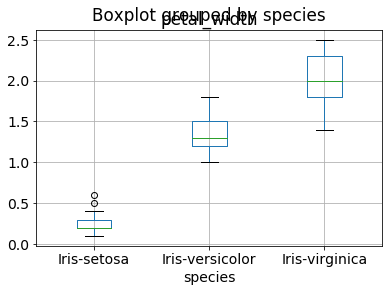

In [55]:
ax = iris.boxplot(column='petal_width', by='species');

#Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)

- Get the accuracy of a null model that simply predicts the most common species.

In [56]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = iris.loc[:, feature_cols]
y = iris.species_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_pred_species = linreg.predict(X_test)
y_test.value_counts()

1    16
0    13
2     9
Name: species_num, dtype: int64

In [57]:
print(y_test.mean())
print(1 - y_test.mean())
print(y_test.value_counts() / len(y_test))

0.8947368421052632
0.10526315789473684
1    0.421053
0    0.342105
2    0.236842
Name: species_num, dtype: float64


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [58]:
# /scrub/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

# /scrub/
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
# /scrub/
y_pred_species = knn.predict(X_test)
y_pred_specied_train = knn.predict(X_train)
print((metrics.accuracy_score(y_test, y_pred_species)))
print((metrics.accuracy_score(y_train, y_pred_specied_train)))


0.9736842105263158
0.9910714285714286


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed better than the null model, but not by much. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The traiing model performed better than the test model. That says that the model has more variance than it does bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say that it has more of a variance problem because the accuaracy score gap is very small.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

the model gets worse as the k is increased. it went from .9736842105263158 to .7631578947368421, but did not increase when going form 10 to 50. Only when I went from 50 to 100. The model also got worse when going from k = 10 to 5

In [68]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred_species = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_species)))

0.7631578947368421


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [69]:
# /scrub/
species = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    specie = float(sum(pred == y)) / len(y)
    species.append([k, specie])

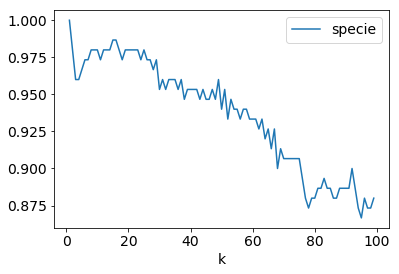

In [70]:
# /scrub/
data = pd.DataFrame(species,columns=['k','specie'])
data.plot.line(x='k',y='specie');

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))